In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing the dataset
df = pd.read_csv('power_database_IND.csv')
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [3]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
#Checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
# checking the data types
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
#Statistical description of the numerical features
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [8]:
# lets look at the description of the categorical features
df.describe(include=object).T

,count,unique,top,freq
country,907,1,IND,907
country_long,907,1,India,907
name,907,907,KOVILKALAPPAL,1
gppd_idnr,907,907,IND0000087,1
primary_fuel,907,8,Coal,258
other_fuel1,198,3,Oil,195
other_fuel2,1,1,Oil,1
owner,342,280,Jk Cement ltd,4
source,907,191,Central Electricity Authority,519
url,907,304,http://www.cea.nic.in/,519


In [9]:
#Checking the shape of the data
df.shape

(907, 27)

After checking for null values and the shape of the dataframe we discover a lot of columns with over 50% of null values and some columns which are completely null, we will look at them closely during our analyses

In [10]:
titles = ['Coal', 'Hydro', 'Solar', 'Wind', 'Gas', 'Biomass', 'Oil', 'Nuclear']

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


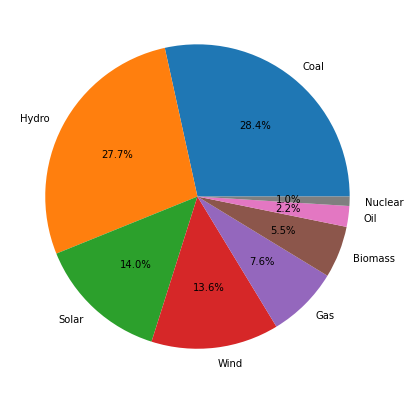

In [11]:
# Let's' take a look at the Primary Fuel Variable
print((df['primary_fuel'].value_counts()))
fig = plt.figure(figsize =(10, 7))
plt.pie(df['primary_fuel'].value_counts(), labels = titles, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

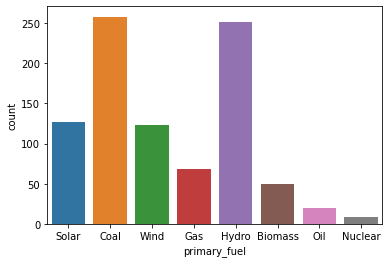

In [12]:
sns.countplot(df['primary_fuel'])

We notice that most of thr primary fuel came from Coal and Hydro, Solar, Wind and Gas also provided a reasonable amount of primary fuel meanwhile Oil and Nuclear were raely used

326.2237552370453


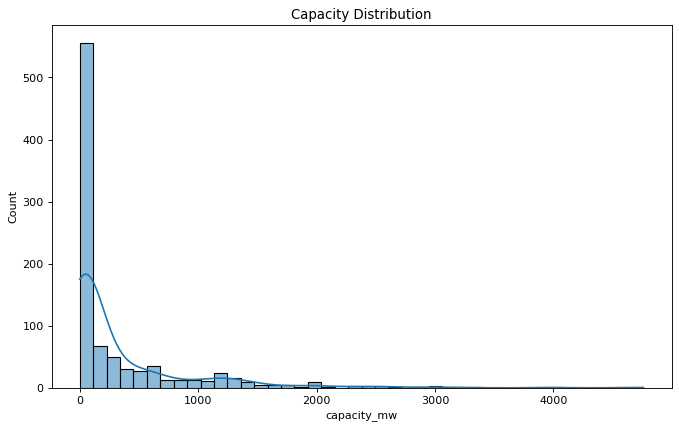

In [13]:
# Let's' take a look at the Capacity Variable
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='capacity_mw', bins=42, kde=True).set_title('Capacity Distribution')
print(df['capacity_mw'].mean())

We can see that majority of the power plants had capacities between 2mw t0 100mw but the capacity range was so wide with some plants going up 4800mw

In [14]:
# defining a function for plotting bar charts
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

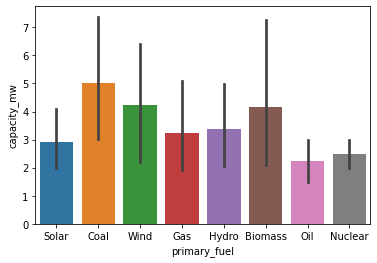

In [15]:
sns.barplot(data=df, x='primary_fuel', y=df['capacity_mw'].value_counts())

<AxesSubplot:title={'center':'Capacity Of Each Primary Fuel Type'}, xlabel='primary_fuel', ylabel='capacity_mw'>

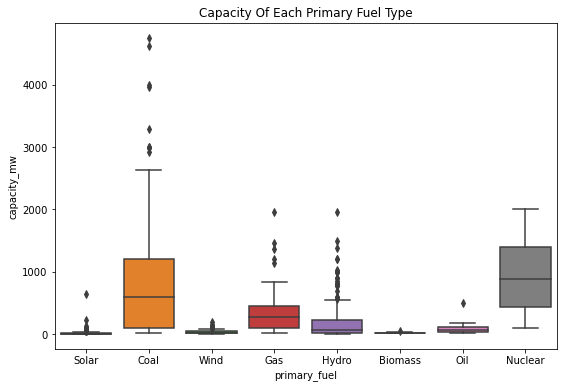

In [16]:
# Lets see if Primary Fuel and Capacity did affect each other
plt.figure(figsize = (9,6))
plt.title('Capacity Of Each Primary Fuel Type')
sns.boxplot(x= 'primary_fuel', y = 'capacity_mw', data = df)

In [17]:
solar = df[df['primary_fuel']== 'Solar']
coal = df[df['primary_fuel']== 'Coal']
wind = df[df['primary_fuel']== 'Wind']
gas = df[df['primary_fuel']== 'Gas']
hydro = df[df['primary_fuel']== 'Hydro']
biomass = df[df['primary_fuel']== 'Biomass']
oil = df[df['primary_fuel']== 'Oil']
nuclear = df[df['primary_fuel']== 'Nuclear']
primary = [solar,coal,wind,gas,hydro,biomass,oil,nuclear]
for i in primary:
    print(np.mean(i.capacity_mw))

21.71259842519685
797.826434108527
33.42967479674796
364.81892753623185
185.02697211155373
20.0652
88.942
975.5555555555555


We notice that despite the fact the nuclear was rarely used, nuclear plants tend to have very high production capabilities with an average capacity of 975mw. We can also see that Solar, Wind, Biomass and Oil have the lowest production capacities.
So we can conclude that the type of fuel the plant uses will affect the capacity of production.

<AxesSubplot:title={'center':'Capacity By Geolocation Source'}, xlabel='geolocation_source', ylabel='capacity_mw'>

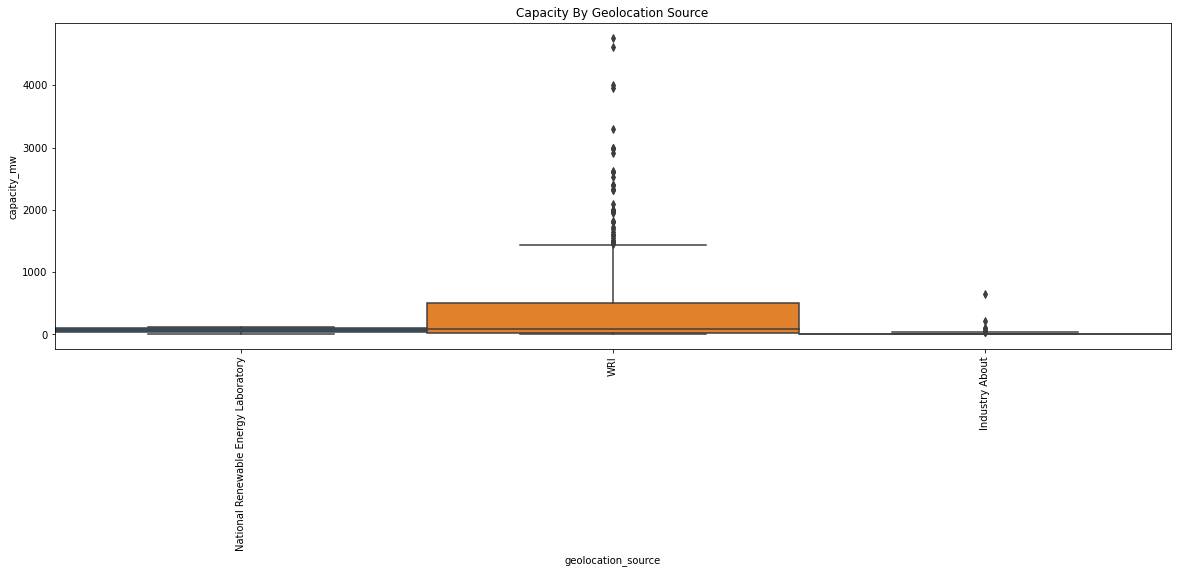

In [18]:
# Let's look at the capacity from various geolocations
plt.figure(figsize =(20,6))
plt.title('Capacity By Geolocation Source')
plt.xticks(rotation ='vertical')
sns.boxplot(x = 'geolocation_source', y = 'capacity_mw', data = df, width = 1, whis= 2)

<AxesSubplot:title={'center':'Capacity By omission Year'}, xlabel='commissioning_year', ylabel='capacity_mw'>

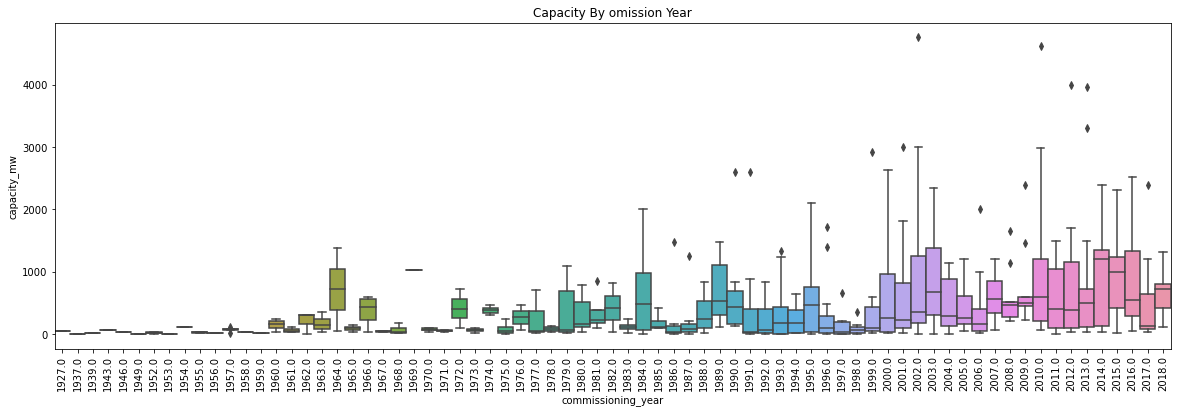

In [19]:
# Let's look at the capacity from various geolocations
plt.figure(figsize =(20,6))
plt.title('Capacity By omission Year')
plt.xticks(rotation ='vertical')
sns.boxplot(x = 'commissioning_year', y = 'capacity_mw', data = df, width = 1, whis= 2)

2431.823590196344


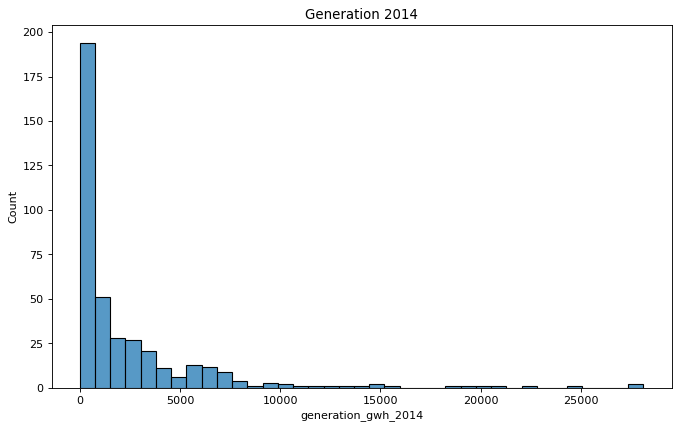

In [20]:
# Let's' take a look at the Generation in 2014
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='generation_gwh_2014').set_title('Generation 2014')
print(df['generation_gwh_2014'].mean())

2428.2269459614085


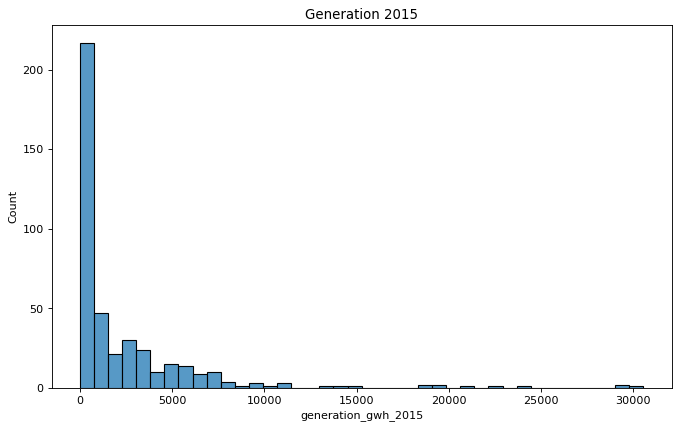

In [21]:
# Let's' take a look at the Generation in 2014
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='generation_gwh_2015').set_title('Generation 2015')
print(df['generation_gwh_2015'].mean())

2467.936858634909


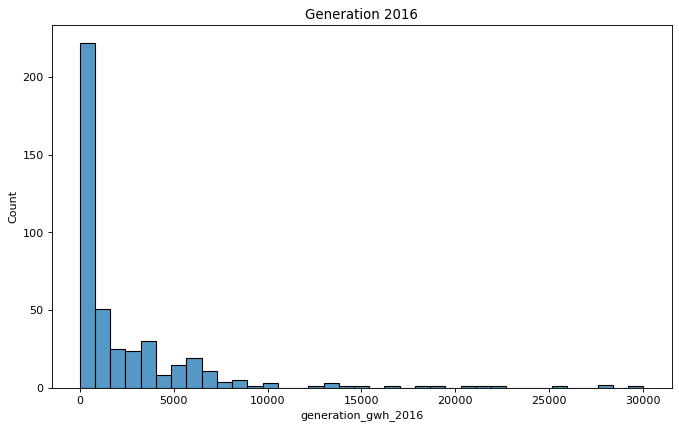

In [22]:
# Let's' take a look at the Generation in 2014
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='generation_gwh_2016').set_title('Generation 2016')
print(df['generation_gwh_2016'].mean())

2547.759304510204


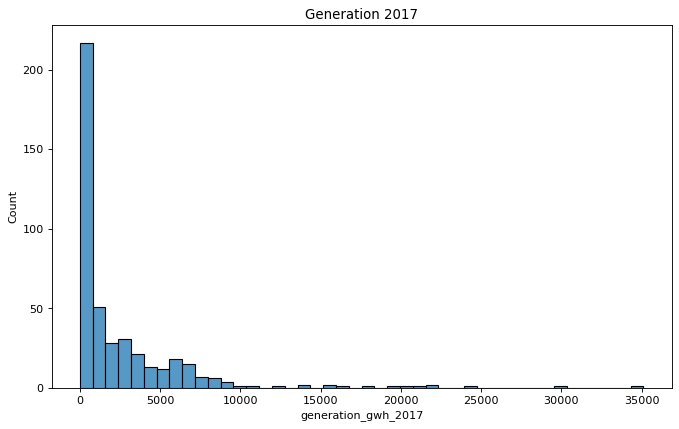

In [23]:
# Let's' take a look at the Generation in 2014
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='generation_gwh_2017').set_title('Generation 2017')
print(df['generation_gwh_2017'].mean())

2600.804098662014


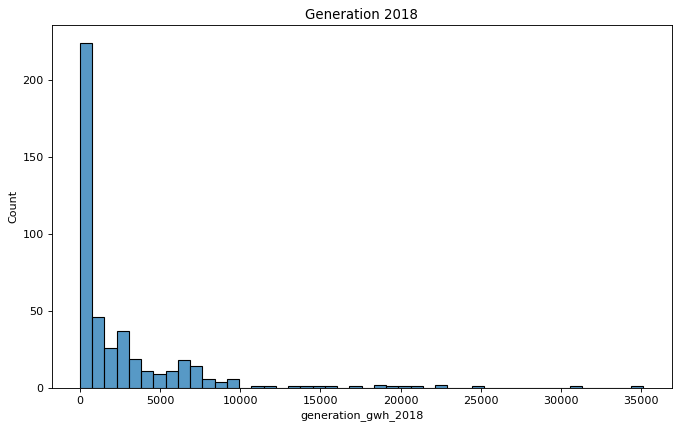

In [24]:
# Let's' take a look at the Generation in 2014
plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='generation_gwh_2018').set_title('Generation 2018')
print(df['generation_gwh_2018'].mean())

### Pre Processing and Data Cleaning

In [25]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

country: Number of unique values 1
________________________________________________
country_long: Number of unique values 1
________________________________________________
name: Number of unique values 907
________________________________________________
gppd_idnr: Number of unique values 907
________________________________________________
capacity_mw: Number of unique values 361
________________________________________________
latitude: Number of unique values 836
________________________________________________
longitude: Number of unique values 827
________________________________________________
primary_fuel: Number of unique values 8
________________________________________________
other_fuel1: Number of unique values 3
________________________________________________
other_fuel2: Number of unique values 1
________________________________________________
other_fuel3: Number of unique values 0
________________________________________________
commissioning_year: Number of unique v

In [26]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [27]:
# We will drop all columns with one unique value since they do not have any influence on the model
uniques = []
for column in df.columns:
    if df[column].nunique() == 1:
        uniques.append(column)
df = df.drop(columns=uniques, axis=1)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel3,commissioning_year,owner,...,geolocation_source,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,...,WRI,NaN,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,NaN
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,...,WRI,NaN,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,NaN


In [28]:
# We will drop all columns with null values above 50%
nulls = []
for column in df.columns:
    if df[column].isnull().sum() > 300:
        nulls.append(column)
df = df.drop(columns=nulls, axis=1)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,source,url,geolocation_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [30]:
# dropping columns that are not important for our model training
df = df.drop(columns=['name','gppd_idnr','url'], axis=1)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,CDM,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [31]:
df.isnull().sum()

capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [32]:
# We will further drop the few rows with null values
df = df.dropna(axis=0)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,CDM,WRI
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI


In [33]:
df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [35]:
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['primary_fuel', 'source', 'geolocation_source']

In [36]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [89]:
# let's save a copy of the dataset which we will use for regression
df1 = df.copy()

In [38]:
# let's split the data for our classificaton model
x =  df.drop('primary_fuel', axis=1)
y = df.primary_fuel
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [39]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,capacity_mw,latitude,longitude,source,geolocation_source
0,-0.050280,0.484053,1.104866,-0.473551,0.405509
1,-0.594285,-0.532182,-0.708494,-0.496357,0.405509
2,-0.576736,-0.941685,-0.267961,0.279054,0.405509
3,-0.563940,1.424108,-0.612857,3.061414,-2.500636
4,-0.589532,0.995476,-1.190341,0.940435,-2.500636


In [40]:
# let's check for skewness
df.skew()

capacity_mw           3.037191
latitude             -0.145866
longitude             1.112646
primary_fuel          0.507576
source                1.778807
geolocation_source   -2.072165
dtype: float64

In [41]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

              feature       VIF
0         capacity_mw  1.111676
1            latitude  1.052214
2           longitude  1.110494
3              source  1.412617
4  geolocation_source  1.449656


### Now we will move ahead with model training

In [61]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(multi_class='multinomial')
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [62]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.6677740863787376
[1]K Nearest Neighbor Training Accuracy: 0.8255813953488372
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.6694352159468439
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.6843853820598007
[4]Ada Boost Training Accuracy: 0.5465116279069767
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9817275747508306


In [63]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    #TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, accuracy_score(y_test,model[i].predict(x_test))))


[[11  2  0  0  0  0  0  2]
 [ 2 62  0 12  0  0  0  0]
 [ 1  6  0 12  0  0  0  1]
 [ 0  7  0 49  0  0  0 14]
 [ 0  3  0  0  0  0  0  0]
 [ 3  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  4  0  0  0 29]]
Model[0] Testing Accuracy = "0.7258687258687259 !"
[[11  2  0  1  0  0  0  1]
 [ 7 62  3  3  0  0  0  1]
 [ 1  6  4  7  0  0  0  2]
 [ 0 11  5 47  0  0  0  7]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  3  1  0  0  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0 12  0  0  0 21]]
Model[1] Testing Accuracy = "0.7027027027027027 !"
[[11  2  0  2  0  0  0  0]
 [ 5 58  0 13  0  0  0  0]
 [ 1  7  0 11  0  0  0  1]
 [ 0  8  0 57  0  0  0  5]
 [ 0  3  0  0  0  0  0  0]
 [ 3  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0 12  0  0  0 21]]
Model[2] Testing Accuracy = "0.7104247104247104 !"
[[11  2  0  2  0  0  0  0]
 [ 5 63  0  7  0  0  0  1]
 [ 1  9  0  8  0  0  0  2]
 [ 0  7  0 61  0  0  0  2]
 [ 0  3  0  0  0  0  0  0]
 [ 3  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0

In [64]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10,100)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 54}


In [65]:
rf = RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=54)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

84.94208494208493
83.50988036026348


In [66]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'none'}


In [68]:
lr = LogisticRegression(multi_class='multinomial',fit_intercept=1, intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

72.58687258687259
55.75144508670521


In [69]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 1}


In [70]:
ab = AdaBoostClassifier(learning_rate=0.1,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

63.7065637065637
60.96316709235112


In [71]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'min_samples_split': 5, 'splitter': 'best'}


In [72]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=5, splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

71.04247104247105
79.6773759913967


In [73]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}


In [74]:
svc = SVC(gamma='scale', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

71.04247104247105
51.22193843258502


In [75]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'weights':['uniform', 'distance'],
             'n_neighbors':list(range(1,10)),
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'}


In [76]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=4, weights='distance')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = dt.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

71.04247104247105
63.76730743379486


In [77]:
# saving the best model
import pickle
pickle.dump(rf, open('powerclass.pkl','wb'))

### Now Let's do Regression to predict the capacity

In [78]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source
0,2.5,28.1839,73.2407,6,109,1
1,98.0,24.7663,74.6090,1,174,2
2,39.2,21.9038,69.3732,7,21,2
3,135.0,23.8712,91.3602,2,22,2
4,1800.0,21.9603,82.4091,1,22,2


In [92]:
# separating features
x = df1.drop('capacity_mw', axis=1)
y = df1['capacity_mw']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [93]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,latitude,longitude,primary_fuel,source,geolocation_source
0,0.364268,2.831195,-0.499988,-0.509200,0.417224
1,-0.236740,-0.146344,-0.059940,-0.509200,0.417224
2,0.400571,-1.773987,-0.940035,-0.509200,0.417224
3,-0.428892,-0.921700,0.820155,0.695449,0.417224
4,0.198398,1.073217,-0.940035,-0.509200,0.417224


In [94]:
lr = LinearRegression()
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is: 0.20521604769056867
At random state 0, the testing accuracy is: 0.25165295543039135


At random state 1, the training accuracy is: 0.2159576621286896
At random state 1, the testing accuracy is: 0.19471300158163996


At random state 2, the training accuracy is: 0.21251743397885448
At random state 2, the testing accuracy is: 0.2122997487920243


At random state 3, the training accuracy is: 0.22499378495051803
At random state 3, the testing accuracy is: 0.17501591193317856


At random state 4, the training accuracy is: 0.2275818119766171
At random state 4, the testing accuracy is: 0.15471027405326754


At random state 5, the training accuracy is: 0.21917377501576185
At random state 5, the testing accuracy is: 0.19111128694031376


At random state 6, the training accuracy is: 0.21513434213056182
At random state 6, the testing accuracy is: 0.19477675435486408


At random state 7, the training accuracy is: 0.2312339397918648
At random state 7, the

At random state 66, the training accuracy is: 0.21442589516637545
At random state 66, the testing accuracy is: 0.20430771361579003


At random state 67, the training accuracy is: 0.20837000835089603
At random state 67, the testing accuracy is: 0.22701841660765976


At random state 68, the training accuracy is: 0.21561472363259881
At random state 68, the testing accuracy is: 0.19912513614694038


At random state 69, the training accuracy is: 0.23494148692311456
At random state 69, the testing accuracy is: 0.12192034756116632


At random state 70, the training accuracy is: 0.22046220451408238
At random state 70, the testing accuracy is: 0.18220132724662574


At random state 71, the training accuracy is: 0.20740766230856722
At random state 71, the testing accuracy is: 0.2341734985227334


At random state 72, the training accuracy is: 0.21414700516192586
At random state 72, the testing accuracy is: 0.2014646546628195


At random state 73, the training accuracy is: 0.20516914383034213
At ra

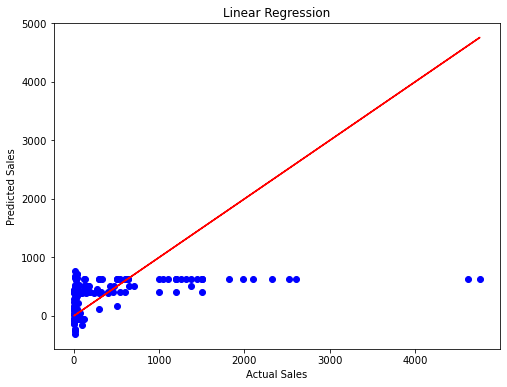

In [95]:
pred_test = lr.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='b')
plt.plot(y_test,y_test, color='r')
plt.title('Linear Regression')
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.show()

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=98)

In [97]:
#Create a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Linear Regression Algorithm to the Training Set
    from sklearn.linear_model import LinearRegression
    log = LinearRegression()
    log.fit(x_train, y_train)

    #Using AdaBoostRegressor 
    from sklearn.ensemble import AdaBoostRegressor
    adb = AdaBoostRegressor()
    adb.fit(x_train, y_train)

    #Using KNNieghborsRegressor Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor()
    knr.fit(x_train, y_train)

    # Gradient Boost Regressor
    from sklearn.ensemble import GradientBoostingRegressor
    gbr = GradientBoostingRegressor()
    gbr.fit(x_train, y_train)

    # Using Gaussian Regressor method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.gaussian_process import GaussianProcessRegressor
    gauss = GaussianProcessRegressor()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeRegressor of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeRegressor
    tree = DecisionTreeRegressor()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Linear Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]AdaBoost Regressor Training Accuracy:', adb.score(x_train, y_train))
    print('[2]KNieghborsRegressor Training Accuracy:', knr.score(x_train, y_train))
    print('[3]Gradient Boosting Regressor Training Accuracy:', gbr.score(x_train, y_train))
    print('[4]Gaussian Regressor Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Regressor Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Regressor Training Accuracy:', forest.score(x_train, y_train))

    return log, adb, knr, gbr, gauss, tree, forest

In [98]:
model = models(x_train,y_train)

[0]Linear Regression Training Accuracy: 0.20444776059203595
[1]AdaBoost Regressor Training Accuracy: 0.4990070191967587
[2]KNieghborsRegressor Training Accuracy: 0.57560706668835
[3]Gradient Boosting Regressor Training Accuracy: 0.7536901077901155
[4]Gaussian Regressor Training Accuracy: 0.9945421979488972
[5]Decision Tree Regressor Training Accuracy: 0.9951232780235466
[6]Random Forest Regressor Training Accuracy: 0.9292698392521805


In [99]:
for i in range(len(model)):
    accuracy = model[i].score(x_test,y_test)
    
    print('Model[{}] Testing Accuracy = "{} !"'.format(i, accuracy))
    print()

Model[0] Testing Accuracy = "0.250203649079061 !"

Model[1] Testing Accuracy = "0.4069225254828711 !"

Model[2] Testing Accuracy = "0.26165872250100664 !"

Model[3] Testing Accuracy = "0.48865283567341944 !"

Model[4] Testing Accuracy = "-71879.96145116739 !"

Model[5] Testing Accuracy = "-0.030660080670494416 !"

Model[6] Testing Accuracy = "0.34205013363986947 !"



In [100]:
# Regularization Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mae', 'poisson'],
             'n_estimators':list(range(10,100)),
             'max_features':['auto', 'sqrt', 'log2']}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 68}


In [105]:
rfr = RandomForestRegressor(criterion='mae',max_features='auto', n_estimators=68)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_dec = rfr.predict(x_test)

rfs = r2_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rfr,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

33.08813905731007
42.54152065777322


In [101]:
# Regularization Linear Regression
from sklearn.linear_model import LinearRegression
parameters = {'fit_intercept':[True,False],
             'normalize':[True,False],
             'n_jobs':[1,-1]}
lr = LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [106]:
lr = LinearRegression(fit_intercept:=True, n_jobs=1, normalize=True)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = r2_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

25.020364907906135
17.77588666086883


In [102]:
# Regularization Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
parameters = {'loss':['linear','exponential','square'],
             'n_estimators':list(range(10,100)),
             'random_state':list(range(0,10))}
abr = AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'loss': 'exponential', 'n_estimators': 10, 'random_state': 2}


In [107]:
abr = AdaBoostRegressor(loss='exponential',random_state=2,n_estimators=10)
abr.fit(x_train,y_train)
abr.score(x_train,y_train)
pred_dec = abr.predict(x_test)

absc = r2_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(abr,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

48.247842412060116
30.68556921678966


In [103]:
# Regularization Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'n_estimators':list(range(10,100)),
             'criterion':['squared_error','mse', 'friedman_mse']}
gbr = GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 39}


In [108]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', n_estimators=39)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = gbr.predict(x_test)

gbsc = r2_score(y_test, pred_dec)
print(absc*100)

gbscore = cross_val_score(gbr,x,y,cv=5)
gbc = gbscore.mean()
print(gbc*100)

48.247842412060116
43.66607043234478


In [109]:
# Regularization Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['squared_error','poisson', 'friedman_mse','absolute_error']}
dtr = DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'min_samples_split': 7, 'splitter': 'random'}


In [110]:
dtr = DecisionTreeRegressor(criterion='friedman_mse', min_samples_split=7, splitter='random')
dtr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_dec = dtr.predict(x_test)

dtsc = r2_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dtr,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

20.06179129485226
25.568966278095708


In [ ]:
When we look accross the various models, GradientBoostingRegressor has the least difference between accuray score and cross_val_score so we will save it as our bes models

In [ ]:
import pickle
pickle.dump(abr, open('abr.pkl','wb'))